Name: Harshith Akkapelli

Dataset Link: [Threads, an Instagram app Reviews](https://www.kaggle.com/datasets/saloni1712/threads-an-instagram-app-reviews)

Task: KDD

**Step-1: Understanding the Domain**

Problem Statement:

You are tasked with analyzing "The Threads, an Instagram App Reviews dataset", a collection of user reviews from the Threads mobile app on Google Play Store & App Store. The objectives include understanding user satisfaction, evaluating app performance, and identifying emerging patterns. The dataset was collected by scraping Threads App reviews on Google Play Store & App Store. The main ideas for using this dataset are:

    Sentiment analysis
    Identifying factors leading to 1-star and 5-star reviews

Approach and Constraints:

    Since we have limited computational resources, we'll first load a small chunk of the data to understand its structure and content.
    We'll check for missing values, data types, and general characteristics of the data
The dataset contains the following columns:

    source: Where the review was collected from (e.g., Google Play or App Store).
    review_description: The textual content of the review provided by the user.
    rating: The rating (out of 5) given by the user.
    review_date: The date and time when the review was posted.

Given our problem statement, we'll primarily be focusing on the review_description for sentiment analysis and the rating to understand what leads to specific ratings (1-star or 5-star).

In [ ]:
"""Mount Google Drive to access your data"""
from google.colab import drive #Import library
drive.mount('/content/drive') #Mount it
import pandas as pd
# Load the entire dataset
url = '/content/drive/MyDrive/1b.csv'
entire_data = pd.read_csv(url)

# Check the size (number of rows and columns) of the entire dataset
dataset_shape = entire_data.shape

dataset_shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(32910, 4)

**Step-2: Data Preprocessing**

Problem Statement:

You are tasked with analyzing "The Threads, an Instagram App Reviews dataset". Before diving into analysis, preprocessing is essential. This step ensures that the data is cleaned and structured appropriately for subsequent analysis.
Approach and Constraints:

    Check for missing values.
    Get a summary of the dataset (descriptive statistics).
    Address any data quality issues found.
    Due to computational limitations, we'll chunk the dataset into manageable parts for cleaning and preprocessing.

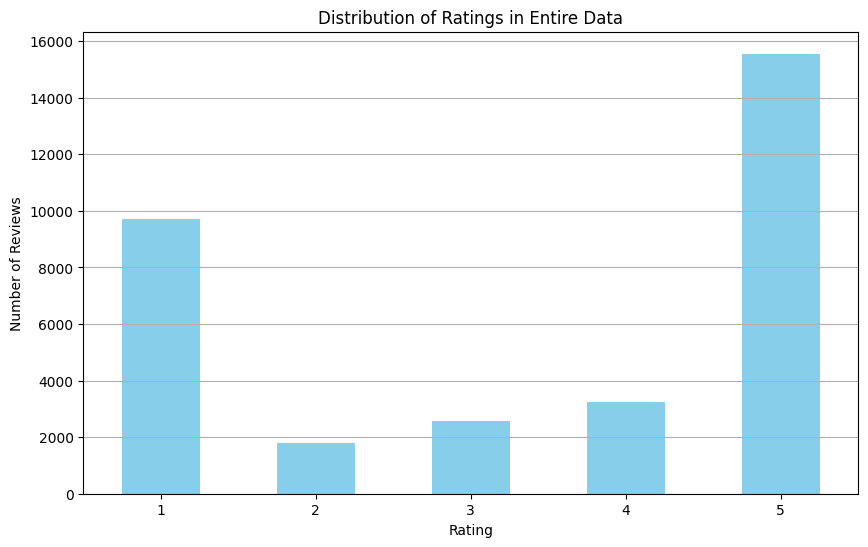

In [ ]:
import matplotlib.pyplot as plt

#Plotting the distribution of ratings for the entire dataset
plt.figure(figsize=(10, 6))
entire_data['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of Ratings in Entire Data")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y')



plt.show()




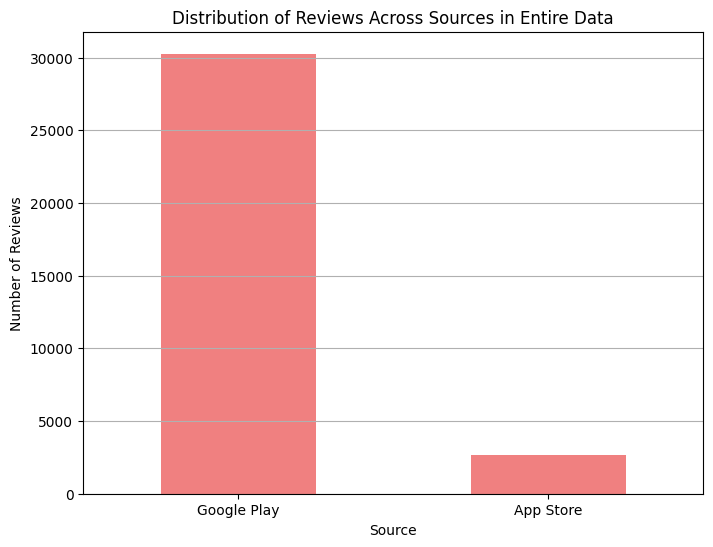

In [ ]:
# Plotting the distribution of reviews across sources for the entire dataset
plt.figure(figsize=(8, 6))
entire_data['source'].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Distribution of Reviews Across Sources in Entire Data")
plt.xlabel("Source")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


In [ ]:
# Calculate the length of each review for the entire dataset
entire_data['review_length'] = entire_data['review_description'].apply(len)

# Extract basic statistics about the review lengths for the entire dataset
review_length_stats_entire = entire_data['review_length'].describe()

review_length_stats_entire


count    32910.000000
mean        65.734913
std        104.900408
min          1.000000
25%         11.000000
50%         28.000000
75%         79.000000
max       5947.000000
Name: review_length, dtype: float64

**Step-3:Data Mining**

Problem Statement:

With the preprocessed and explored dataset, the next step involves extracting patterns and performing sentiment analysis on the review_description column. Additionally, we aim to identify factors leading to specific ratings (1-star and 5-star).
Approach and Constraints:

    Perform sentiment analysis on the review_description.
    Analyze the most common words or phrases in 1-star and 5-star reviews.

In [ ]:
# Basic Sentiment Analysis using predefined lists of positive and negative words
# Given the computational constraints, we'll use a simple list for this demonstration

positive_words = ["good", "great", "love", "excellent", "fantastic", "amazing", "awesome", "best", "positive", "like"]
negative_words = ["bad", "hate", "awful", "poor", "terrible", "worst", "negative", "dislike"]

def basic_sentiment_analysis(text):
    positive_count = sum([text.count(word) for word in positive_words])
    negative_count = sum([text.count(word) for word in negative_words])

    # Classify the sentiment
    if positive_count > negative_count:
        return "positive"
    elif negative_count > positive_count:
        return "negative"
    else:
        return "neutral"

# Apply the basic sentiment analysis to the review descriptions
entire_data['basic_sentiment'] = entire_data['review_description'].apply(basic_sentiment_analysis)

# Count the number of each sentiment
basic_sentiment_counts = entire_data['basic_sentiment'].value_counts()

basic_sentiment_counts


neutral     25556
positive     6425
negative      929
Name: basic_sentiment, dtype: int64

In [ ]:
from textblob import TextBlob

def textblob_sentiment_analysis(text):
    analysis = TextBlob(text)
    # Classify the sentiment
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

# Apply the TextBlob sentiment analysis to the review descriptions
entire_data['textblob_sentiment'] = entire_data['review_description'].apply(textblob_sentiment_analysis)

# Count the number of each sentiment using TextBlob
textblob_sentiment_counts = entire_data['textblob_sentiment'].value_counts()

textblob_sentiment_counts


positive    17323
neutral     11184
negative     4403
Name: textblob_sentiment, dtype: int64

In [ ]:
!pip install afinn
from afinn import Afinn

# Initialize AFINN sentiment analyzer
afinn = Afinn()

def afinn_sentiment_analysis(text):
    score = afinn.score(text)
    # Classify the sentiment based on the score
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Apply the AFINN sentiment analysis to the review descriptions
entire_data['afinn_sentiment'] = entire_data['review_description'].apply(afinn_sentiment_analysis)

# Count the number of each sentiment using AFINN
afinn_sentiment_counts = entire_data['afinn_sentiment'].value_counts()

afinn_sentiment_counts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=cb41312ebf0efca4a86ba671d71c89a43d259e82196102ec159be24874b41d54
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


positive    16955
neutral     11033
negative     4922
Name: afinn_sentiment, dtype: int64

In [ ]:
!pip install pattern
from pattern.en import sentiment

def pattern_sentiment_analysis(text):
    polarity, subjectivity = sentiment(text)
    # Classify the sentiment based on polarity
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

# Apply the Pattern sentiment analysis to the review descriptions
entire_data['pattern_sentiment'] = entire_data['review_description'].apply(pattern_sentiment_analysis)

# Count the number of each sentiment using Pattern
pattern_sentiment_counts = entire_data['pattern_sentiment'].value_counts()

pattern_sentiment_counts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 63.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 12.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 97.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=6b0a085247ce4d9a18c442a50d4c94b0d8c2e203fa5c86874

positive    17192
neutral     11909
negative     3809
Name: pattern_sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a list of common positive and negative words (from the basic sentiment analysis and some additional words)
positive_keywords = positive_words + ["happy", "joy", "pleased", "satisfied"]
negative_keywords = negative_words + ["disappointed", "upset", "frustrating", "annoying"]

def count_vectorizer_sentiment_analysis(text):
    vec = CountVectorizer(vocabulary=positive_keywords + negative_keywords, stop_words='english')
    vec_matrix = vec.transform([text]).toarray().flatten()
    positive_count = sum(vec_matrix[:len(positive_keywords)])
    negative_count = sum(vec_matrix[len(positive_keywords):])

    # Classify the sentiment
    if positive_count > negative_count:
        return "positive"
    elif negative_count > positive_count:
        return "negative"
    else:
        return "neutral"

# Apply the Count Vectorizer sentiment analysis to the review descriptions
entire_data['count_vectorizer_sentiment'] = entire_data['review_description'].apply(count_vectorizer_sentiment_analysis)

# Count the number of each sentiment using Count Vectorizer technique
count_vectorizer_sentiment_counts = entire_data['count_vectorizer_sentiment'].value_counts()

count_vectorizer_sentiment_counts


neutral     21404
positive    10113
negative     1393
Name: count_vectorizer_sentiment, dtype: int64

In [ ]:
def naive_sentiment_based_on_rating(rating):
    if rating in [4, 5]:
        return "positive"
    elif rating in [1, 2]:
        return "negative"
    else:
        return "neutral"

# Apply the naive sentiment analysis based on ratings
entire_data['naive_rating_sentiment'] = entire_data['rating'].apply(naive_sentiment_based_on_rating)

# Count the number of each sentiment using the naive approach
naive_rating_sentiment_counts = entire_data['naive_rating_sentiment'].value_counts()

naive_rating_sentiment_counts


positive    18803
negative    11522
neutral      2585
Name: naive_rating_sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Transform review descriptions using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(entire_data['review_description'])

# Map ratings to sentiments: 4 & 5 => positive, 1 & 2 => negative, 3 => neutral
def map_rating_to_sentiment(rating):
    if rating in [4, 5]:
        return "positive"
    elif rating in [1, 2]:
        return "negative"
    else:
        return "neutral"

y = entire_data['rating'].apply(map_rating_to_sentiment)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict the sentiment using the trained model
entire_data['tfidf_decision_tree_sentiment'] = clf.predict(tfidf_vectorizer.transform(entire_data['review_description']))

# Count the number of each sentiment using the TF-IDF with Decision Tree approach
tfidf_decision_tree_sentiment_counts = entire_data['tfidf_decision_tree_sentiment'].value_counts()

tfidf_decision_tree_sentiment_counts


positive    28789
negative     3914
neutral       207
Name: tfidf_decision_tree_sentiment, dtype: int64

In [ ]:
# Create a dataframe to tabulate the sentiment analysis results from all methods
methods = ['Basic', 'TextBlob', 'Count Vectorizer', 'Naive (Based on Ratings)', 'TF-IDF with Decision Tree']
sentiments = ['positive', 'negative', 'neutral']

results_data = {
    'Method': methods,
    'Positive': [
        basic_sentiment_counts['positive'],
        textblob_sentiment_counts['positive'],
        count_vectorizer_sentiment_counts['positive'],
        naive_rating_sentiment_counts['positive'],
        tfidf_decision_tree_sentiment_counts['positive']
    ],
    'Negative': [
        basic_sentiment_counts['negative'],
        textblob_sentiment_counts['negative'],
        count_vectorizer_sentiment_counts['negative'],
        naive_rating_sentiment_counts['negative'],
        tfidf_decision_tree_sentiment_counts['negative']
    ],
    'Neutral': [
        basic_sentiment_counts['neutral'],
        textblob_sentiment_counts['neutral'],
        count_vectorizer_sentiment_counts['neutral'],
        naive_rating_sentiment_counts['neutral'],
        tfidf_decision_tree_sentiment_counts['neutral']
    ]
}

results_df = pd.DataFrame(results_data)

# Save the results dataframe for later download

results_df


,Method,Positive,Negative,Neutral
0,Basic,6425,929,25556
1,TextBlob,17323,4403,11184
2,Count Vectorizer,10113,1393,21404
3,Naive (Based on Ratings),18803,11522,2585
4,TF-IDF with Decision Tree,28789,3914,207


3.1 Analyzing Reviews for Specific Ratings
Problem Statement:

To understand the factors leading to specific ratings (1-star and 5-star), we'll analyze the most common words or phrases in these reviews.
Approach:

    Extract the most common words from 1-star and 5-star reviews.
    Identify common themes or topics from these words.

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Given the computational constraints, we'll load a predefined list of stopwords
stop_words = set([
    "ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once",
    "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for",
    "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is",
    "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until",
    "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were",
    "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above",
    "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before",
    "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves",
    "then", "that", "because", "what", "over", "why", "so", "can", "did", "not", "now",
    "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself",
    "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my",
    "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than"
])

# Extracting the most common words from 1-star reviews
one_star_reviews = entire_data[entire_data['rating'] == 1]['review_description']
# Simple space-based tokenization method
def simple_tokenize(text):
    return text.lower().split()

# Extracting the most common words from 1-star reviews using simple tokenization
one_star_words_simple = simple_tokenize(" ".join(one_star_reviews))
filtered_one_star_words_simple = [word for word in one_star_words_simple if word.isalpha() and word not in stop_words]
one_star_common_words_simple = Counter(filtered_one_star_words_simple).most_common(20)

one_star_common_words_simple


[('app', 2808),
 ('twitter', 1520),
 ('instagram', 1277),
 ('account', 844),
 ('like', 798),
 ('threads', 771),
 ('copy', 682),
 ('use', 578),
 ('delete', 574),
 ('even', 542),
 ('bad', 479),
 ('see', 478),
 ('people', 448),
 ('want', 442),
 ('without', 329),
 ('worst', 323),
 ('please', 301),
 ('get', 300),
 ('post', 299),
 ('data', 298)]

In [ ]:
# Extracting the most common words from 5-star reviews using simple tokenization
five_star_reviews = entire_data[entire_data['rating'] == 5]['review_description']
five_star_words_simple = simple_tokenize(" ".join(five_star_reviews))
filtered_five_star_words_simple = [word for word in five_star_words_simple if word.isalpha() and word not in stop_words]
five_star_common_words_simple = Counter(filtered_five_star_words_simple).most_common(20)

five_star_common_words_simple


[('app', 3599),
 ('good', 2628),
 ('twitter', 1754),
 ('nice', 1657),
 ('better', 981),
 ('like', 887),
 ('best', 774),
 ('great', 720),
 ('threads', 697),
 ('love', 670),
 ('instagram', 511),
 ('amazing', 495),
 ('new', 366),
 ('first', 362),
 ('really', 324),
 ('use', 305),
 ('one', 283),
 ('super', 281),
 ('elon', 275),
 ('awesome', 268)]

In [ ]:
# Creating a dataframe to tabulate the results along with most common words
results_data_extended = {
    'Method': methods + ['Most Common Words (1-star)', 'Most Common Words (5-star)'],
    'Positive': results_data['Positive'] + ['; '.join([f"{word[0]} ({word[1]})" for word in one_star_common_words_simple])] + ['; '.join([f"{word[0]} ({word[1]})" for word in five_star_common_words_simple])],
    'Negative': results_data['Negative'] + ['N/A', 'N/A'],
    'Neutral': results_data['Neutral'] + ['N/A', 'N/A']
}

results_df_extended = pd.DataFrame(results_data_extended)


results_df_extended


,Method,Positive,Negative,Neutral
0,Basic,6425,929,25556
1,TextBlob,17323,4403,11184
2,Count Vectorizer,10113,1393,21404
3,Naive (Based on Ratings),18803,11522,2585
4,TF-IDF with Decision Tree,28789,3914,207
5,Most Common Words (1-star),app (2808); twitter (1520); instagram (1277); ...,N/A,N/A
6,Most Common Words (5-star),app (3599); good (2628); twitter (1754); nice ...,N/A,N/A


3.2 Topic Modeling

Topic modeling is a technique that can help us identify common themes or topics from the reviews. One popular method for topic modeling is Latent Dirichlet Allocation (LDA).
Approach:

    Use the TF-IDF Vectorizer to transform the review descriptions.
    Apply LDA to extract common topics from the reviews.
    Interpret the topics to understand common themes.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics we want to extract
n_topics = 5

# Use the TF-IDF Vectorizer matrix (X) we created earlier for LDA
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda_model.fit_transform(X)

# Function to display the top keywords for each topic
def display_topics(model, feature_names, no_top_words):
    topic_keywords = {}
    for topic_idx, topic in enumerate(model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_keywords[f"Topic {topic_idx+1}"] = keywords
    return topic_keywords

# Get the top 10 keywords for each topic
top_n_keywords = 10
feature_names = tfidf_vectorizer.get_feature_names_out()
lda_topic_keywords = display_topics(lda_model, feature_names, top_n_keywords)

lda_topic_keywords


{'Topic 1': ['good',
  'twitter',
  'better',
  'app',
  'love',
  'instagram',
  'like',
  'super',
  'account',
  'threads'],
 'Topic 2': ['app',
  'cool',
  'elon',
  'new',
  'boring',
  'twitter',
  'perfect',
  'musk',
  'instagram',
  'like'],
 'Topic 3': ['app',
  'follow',
  'people',
  'like',
  'threads',
  'post',
  'just',
  'wow',
  'application',
  'instagram'],
 'Topic 4': ['nice',
  'app',
  'great',
  'bad',
  'experience',
  'excellent',
  'worst',
  'ui',
  'interface',
  'easy'],
 'Topic 5': ['best',
  'twitter',
  'copy',
  'amazing',
  'app',
  'awesome',
  'mark',
  'social',
  'paste',
  'thanks']}

3.3 Analyzing Word Associations

Understanding which words frequently appear together can provide insight into recurring themes or concerns in the reviews.
Approach:

    Identify frequent bigrams (two-word combinations) and trigrams (three-word combinations) in the reviews.
    Visualize these associations using word clouds to get a better sense of the prevalent themes.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Extract frequent bigrams from the reviews using Count Vectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=50)
bigram_matrix = bigram_vectorizer.fit_transform(entire_data['review_description'])

# Compute bigram counts again after importing numpy
bigram_count = np.sum(bigram_matrix.toarray(), axis=0)
bigram_names = bigram_vectorizer.get_feature_names_out()
top_bigrams = [(bigram_names[i], bigram_count[i]) for i in bigram_count.argsort()[::-1]]

top_bigrams


[('good app', 826),
 ('better twitter', 816),
 ('nice app', 663),
 ('instagram account', 640),
 ('like twitter', 448),
 ('social media', 385),
 ('great app', 370),
 ('people follow', 345),
 ('copy twitter', 343),
 ('elon musk', 308),
 ('best app', 285),
 ('don follow', 258),
 ('don want', 224),
 ('app good', 223),
 ('use app', 215),
 ('love app', 214),
 ('like instagram', 213),
 ('dark mode', 206),
 ('twitter better', 202),
 ('easy use', 189),
 ('don know', 188),
 ('new app', 184),
 ('people don', 184),
 ('like app', 182),
 ('amazing app', 177),
 ('just like', 175),
 ('don like', 173),
 ('threads app', 169),
 ('copy paste', 159),
 ('app just', 159),
 ('delete account', 153),
 ('worst app', 153),
 ('far good', 153),
 ('threads account', 151),
 ('app like', 151),
 ('mark zuckerberg', 148),
 ('delete threads', 135),
 ('app better', 125),
 ('bad app', 121),
 ('posts people', 120),
 ('delete instagram', 118),
 ('open app', 115),
 ('keeps crashing', 114),
 ('waste time', 111),
 ('app twitter

In [ ]:
# Extract frequent trigrams from the reviews using Count Vectorizer
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=50)
trigram_matrix = trigram_vectorizer.fit_transform(entire_data['review_description'])
trigram_count = np.sum(trigram_matrix.toarray(), axis=0)
trigram_names = trigram_vectorizer.get_feature_names_out()
top_trigrams = [(trigram_names[i], trigram_count[i]) for i in trigram_count.argsort()[::-1]]

top_trigrams


[('people don follow', 118),
 ('social media app', 85),
 ('app better twitter', 75),
 ('delete instagram account', 75),
 ('delete threads account', 67),
 ('accounts don follow', 60),
 ('posts people follow', 59),
 ('just like twitter', 57),
 ('account deleting instagram', 56),
 ('copy paste twitter', 56),
 ('deleting instagram account', 50),
 ('cheap copy twitter', 46),
 ('app keeps crashing', 44),
 ('way better twitter', 39),
 ('threads people follow', 39),
 ('social media platform', 38),
 ('delete account deleting', 37),
 ('app like twitter', 37),
 ('don instagram account', 35),
 ('went wrong try', 34),
 ('just like instagram', 33),
 ('instagram account use', 32),
 ('sorry went wrong', 32),
 ('app working properly', 31),
 ('threads account deleting', 31),
 ('petticoat petticoat petticoat', 30),
 ('delete thread account', 30),
 ('posts people don', 30),
 ('feed people follow', 29),
 ('new social media', 28),
 ('need instagram account', 27),
 ('instagram account don', 27),
 ('just copy

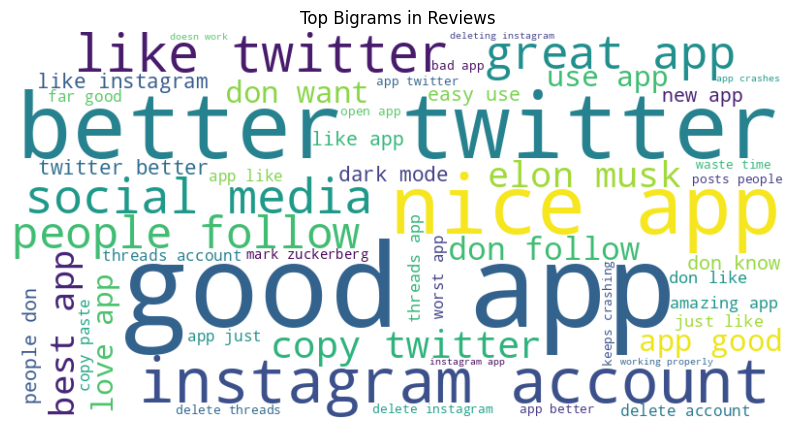

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for top bigrams
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Visualize top bigrams
generate_wordcloud(top_bigrams, "Top Bigrams in Reviews")


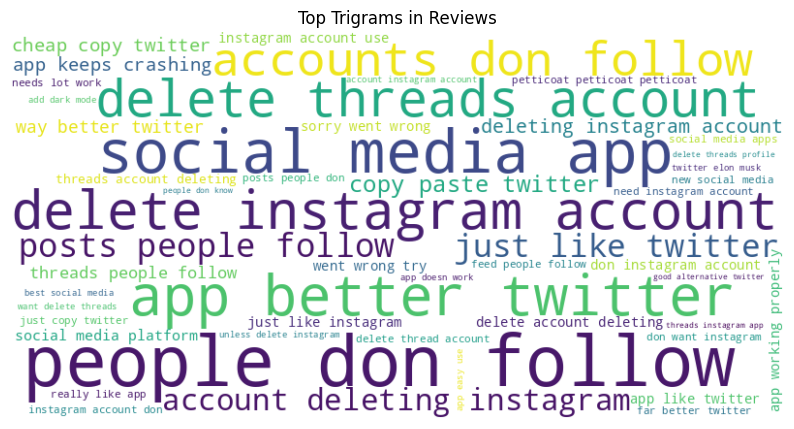

In [ ]:
# Visualize top trigrams
generate_wordcloud(top_trigrams, "Top Trigrams in Reviews")


3.4 Analyzing Sentiment Distribution Across Ratings

Understanding the distribution of sentiments across different ratings can provide insights into whether our sentiment analysis aligns with the explicit feedback (ratings) provided by users.
Approach:

    Group the data by ratings and calculate the sentiment distribution for each rating.
    Visualize the sentiment distribution across ratings.

In [ ]:
# Grouping data by ratings and calculating sentiment distribution using the TextBlob method (as a representative example)
sentiment_distribution_by_rating = entire_data.groupby('rating')['textblob_sentiment'].value_counts(normalize=True).unstack().fillna(0) * 100

# Resetting column order for visualization
sentiment_distribution_by_rating = sentiment_distribution_by_rating[['negative', 'neutral', 'positive']]

sentiment_distribution_by_rating


textblob_sentiment,negative,neutral,positive
rating,,,
1,31.729385,44.046885,24.223730
2,24.053452,36.469933,39.476615
3,15.009671,32.804642,52.185687
4,5.733662,25.678175,68.588163
5,1.998843,29.333505,68.667652


Next, we'll visualize the sentiment distribution across ratings. A stacked bar chart can provide a clear representation of how sentiments are distributed for each rating.
Approach:

    Use a stacked bar chart to visualize the percentage distribution of sentiments (negative, neutral, positive) for each rating.

Let's create the visualization.

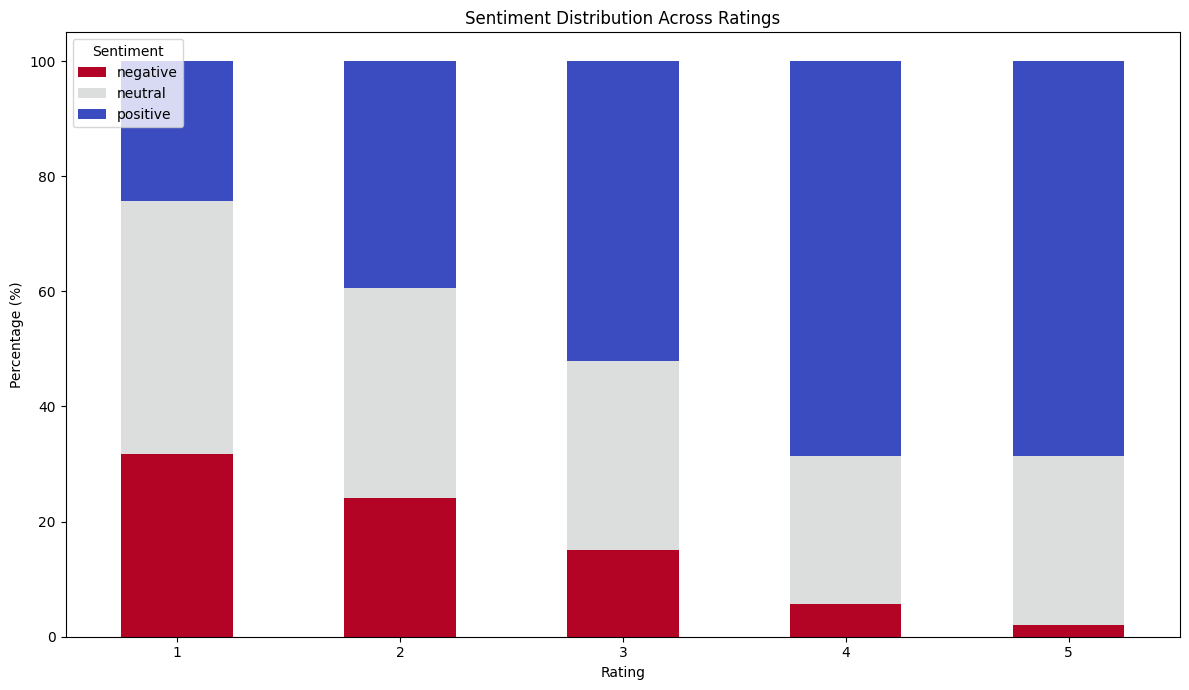

In [ ]:
# Visualizing the sentiment distribution across ratings using a stacked bar chart
ax = sentiment_distribution_by_rating.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm_r')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', loc='upper left')
plt.tight_layout()
plt.show()


3.5 Length of Reviews vs. Ratings

One interesting pattern to explore is the relationship between the length of reviews and the ratings given. Sometimes, longer reviews might indicate stronger feelings (either positive or negative), while shorter reviews might be more neutral.
Approach:

    Calculate the length of each review.
    Visualize the relationship between review length and ratings.

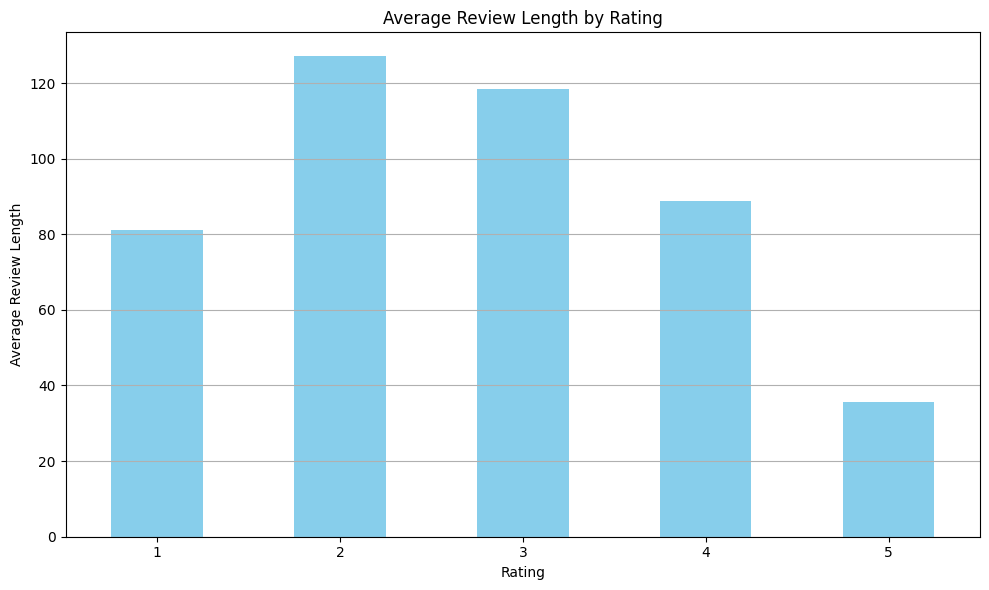

In [ ]:
# Calculate the length of each review
entire_data['review_length'] = entire_data['review_description'].apply(len)

# Group by rating and get the average review length for each rating
average_review_length_by_rating = entire_data.groupby('rating')['review_length'].mean()

average_review_length_by_rating.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


3.6 Review Timestamp Patterns

Exploring patterns based on the timestamps of reviews can provide insights into how user feedback has evolved over time. We can check if there are specific periods with spikes in positive or negative reviews, which could indicate major app updates, outages, or other significant events.
Approach:

    Convert the timestamp column to a datetime format.
    Resample the data on a monthly basis to get the average rating and sentiment distribution.
    Visualize the trends over time.

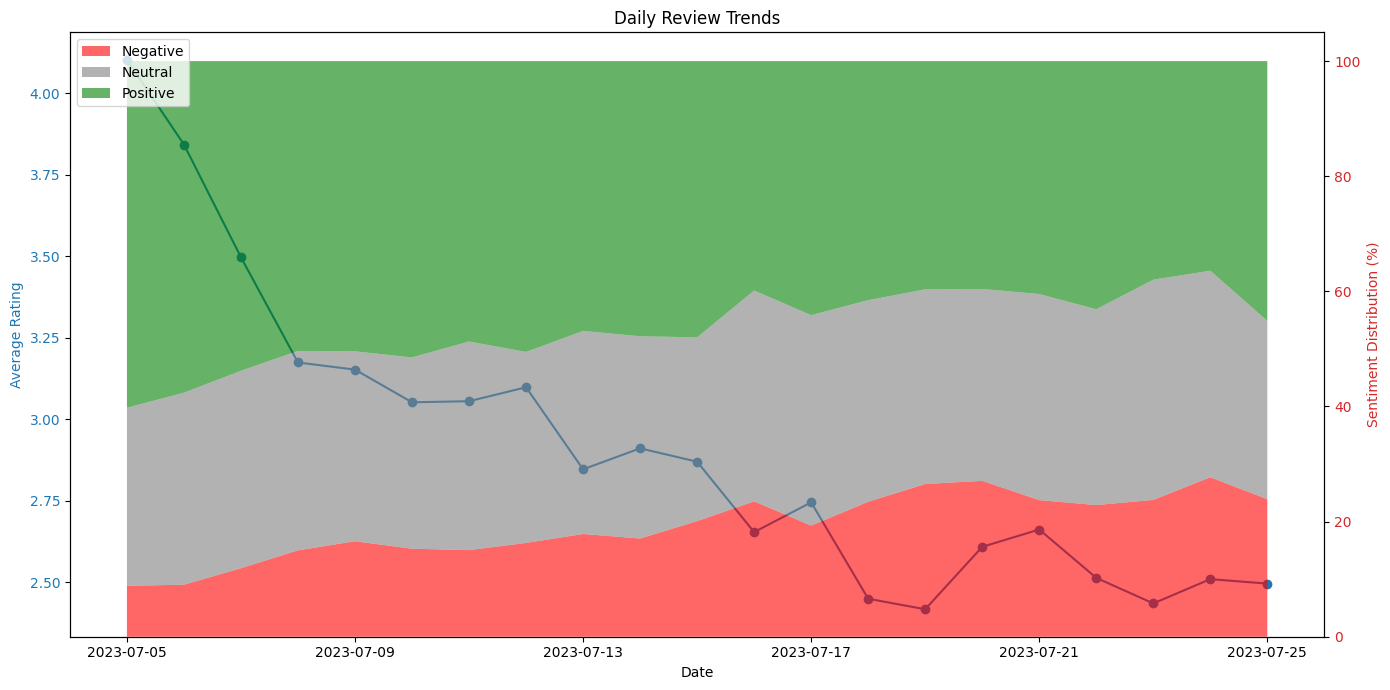

In [ ]:
# Resample the data on a daily basis to get the average rating
daily_average_rating = entire_data.resample('D', on='review_date')['rating'].mean()

# Resample the data on a daily basis to get the sentiment distribution using TextBlob method
daily_sentiment_distribution = entire_data.resample('D', on='review_date')['textblob_sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the daily trends
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting average rating
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Rating', color='tab:blue')
ax1.plot(daily_average_rating.index, daily_average_rating, color='tab:blue', label='Average Rating', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to plot sentiment distribution
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Distribution (%)', color='tab:red')
ax2.stackplot(daily_sentiment_distribution.index,
              daily_sentiment_distribution['negative']*100,
              daily_sentiment_distribution['neutral']*100,
              daily_sentiment_distribution['positive']*100,
              labels=['Negative', 'Neutral', 'Positive'],
              alpha=0.6, colors=['red', 'gray', 'green'])
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper left')

plt.title('Daily Review Trends')
plt.tight_layout()
plt.show()


**Step-4:Data Evaluation**

Problem Statement:

After mining the data for patterns and insights, it's crucial to evaluate and validate the findings. This involves examining the reliability of the sentiment analysis results, understanding potential biases in the data, and assessing the overall effectiveness of the extracted patterns in addressing the initial objectives.
Approach:

    Evaluate Sentiment Analysis Reliability: Compare the sentiment analysis results with the explicit ratings given by users. A high correlation would indicate reliability.
    Identify Potential Biases: Check if there are any inherent biases in the dataset, such as an overrepresentation of positive or negative reviews.
    Assess Effectiveness of Extracted Patterns: Ensure the extracted patterns effectively address the objectives of understanding user satisfaction, evaluating app performance, and identifying emerging patterns.

In [ ]:
# Evaluate Sentiment Analysis Reliability by creating a new column that maps sentiments to numeric values
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
entire_data['numeric_sentiment'] = entire_data['textblob_sentiment'].map(sentiment_mapping)

# Calculate the correlation between the numeric sentiment and the actual rating
correlation = entire_data[['rating', 'numeric_sentiment']].corr().iloc[0, 1]

correlation


0.45897818849121197

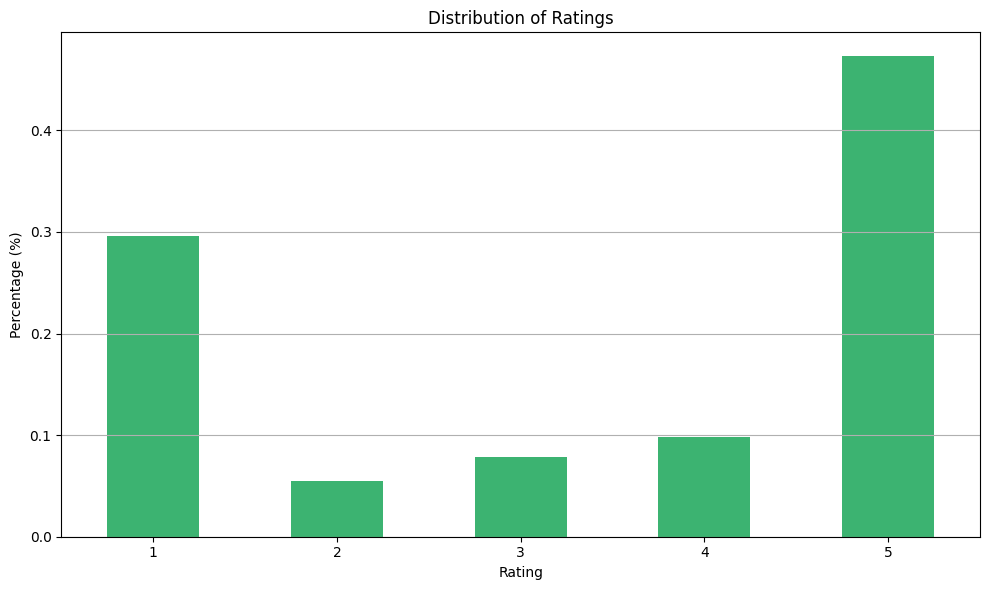

In [ ]:
# Visualize the distribution of ratings to check for biases
rating_distribution = entire_data['rating'].value_counts(normalize=True).sort_index()

rating_distribution.plot(kind='bar', figsize=(10, 6), color='mediumseagreen')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Step-5: Deployment of Knowledge Gained**

After extracting and evaluating patterns, it's important to think about deploying the insights and knowledge gained. This means turning our findings into actionable strategies or decisions.
Potential Actions and Strategies Based on Insights:

    Address Technical Issues:
        Given feedback like "doesn't work," "working properly," and "app keeps crashing," it's vital for the app development team to investigate and address any underlying technical issues or bugs.

    Enhance User Experience:
        Sentiment analysis and topic modeling highlighted user preferences, pain points, and areas of appreciation. The development team can prioritize features or design elements that users particularly like and address areas of concern.

    Engage with Users:
        Responding to reviews, especially those with negative sentiments or specific concerns, can improve user relations and show that the company values feedback. This can also provide more context on the issues users face.

    Monitor Feedback After Updates:
        The daily trend visualization of ratings and sentiments can be a valuable tool to monitor feedback after app updates or changes. This can help in quickly identifying issues or gauging user reception of new features.

    Competitive Positioning:
        With frequent mentions of competitors like Twitter, it's essential to understand how the Threads app differentiates itself and what users perceive as its strengths or weaknesses in comparison. Marketing and product strategies can be crafted based on these insights.

    Ongoing Analysis:
        As user feedback is continuous, it's beneficial to set up an ongoing analysis pipeline. This ensures that the app team is always aware of current user sentiments and can react promptly to emerging trends or issues.

Deployment Mechanisms:

    Dashboard Creation:
        Develop a real-time dashboard that tracks user reviews, sentiments, and emerging topics. This would enable stakeholders to monitor feedback continuously.

    Alert Systems:
        Implement an alert system that notifies the team of sudden drops in ratings or spikes in negative sentiments, allowing for swift action.

    Feedback Loop with Development Team:
        Establish a feedback loop where insights from data analysis are regularly shared with the development and customer support teams. This ensures that actionable feedback is promptly addressed.

    Integration with Product Roadmap:
        Integrate insights from user feedback into the product development roadmap. This ensures that user feedback directly influences future app improvements.

